In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load Dataset

df = pd.read_csv("/Users/salehalzahrani/Downloads/Chocolate Sales (2).csv")

# Display first 5 rows
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [4]:
# Check all values
print(df.isna())

      Sales Person  Country  Product   Date  Amount  Boxes Shipped
0            False    False    False  False   False          False
1            False    False    False  False   False          False
2            False    False    False  False   False          False
3            False    False    False  False   False          False
4            False    False    False  False   False          False
...            ...      ...      ...    ...     ...            ...
3277         False    False    False  False   False          False
3278         False    False    False  False   False          False
3279         False    False    False  False   False          False
3280         False    False    False  False   False          False
3281         False    False    False  False   False          False

[3282 rows x 6 columns]


In [5]:
print(df.isna().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [6]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [7]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (3282, 6) 

number of rows:  3282
number of columns:  6


In [8]:
# viewing the data types of columns
df.dtypes

Sales Person       str
Country            str
Product            str
Date               str
Amount             str
Boxes Shipped    int64
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = df['Amount'].replace(r'[$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

df.dtypes

Sales Person                str
Country                     str
Product                     str
Date             datetime64[us]
Amount                  float64
Boxes Shipped             int64
dtype: object

In [12]:
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,1290,3282.000000,3282.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,50% Dark Bites,NaN,NaN,NaN
freq,162,615,180,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-06-25 18:39:37.674418,6030.338775,164.666971
min,NaN,NaN,NaN,2022-01-02 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-10-03 00:00:00,2521.495000,71.000000
50%,NaN,NaN,NaN,2023-07-02 00:00:00,5225.500000,137.000000
75%,NaN,NaN,NaN,2024-04-03 00:00:00,8556.842500,232.000000
max,NaN,NaN,NaN,2024-12-08 00:00:00,26170.950000,778.000000


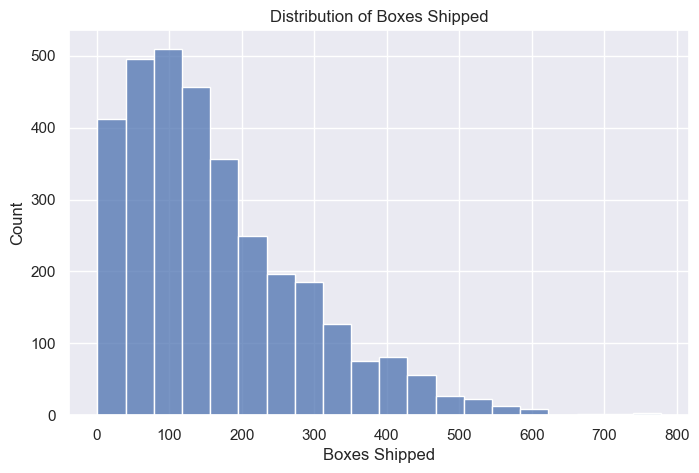

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

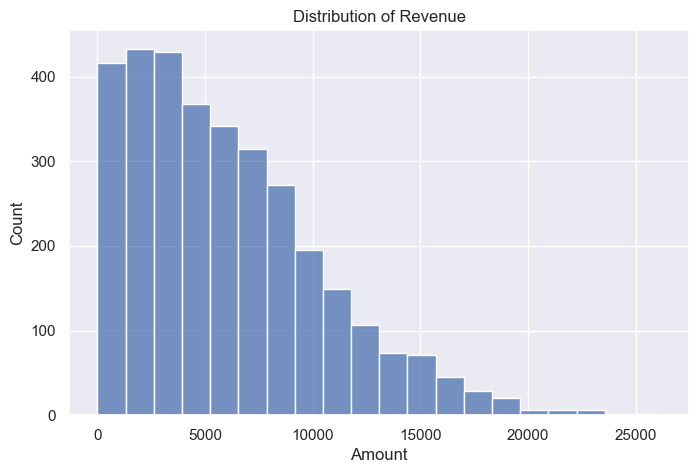

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

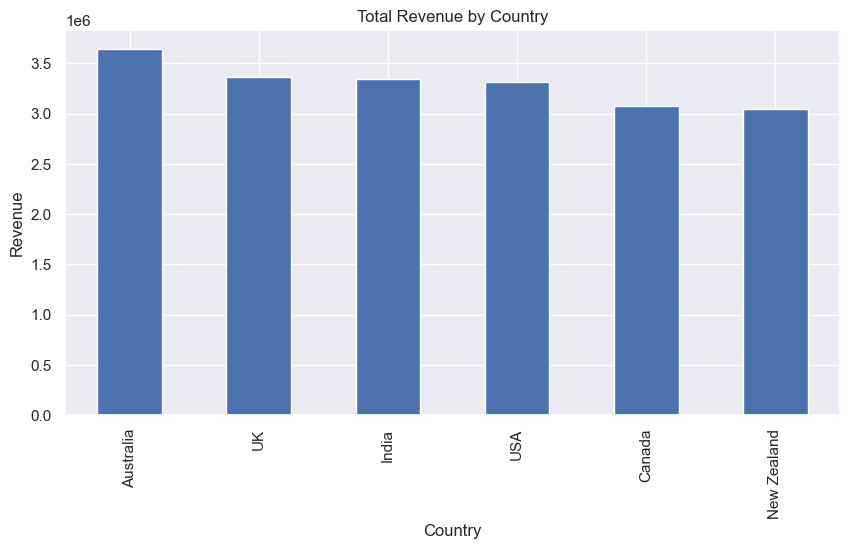

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [18]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Country")
plt.ylabel("Revenue")
plt.show()

country_revenue

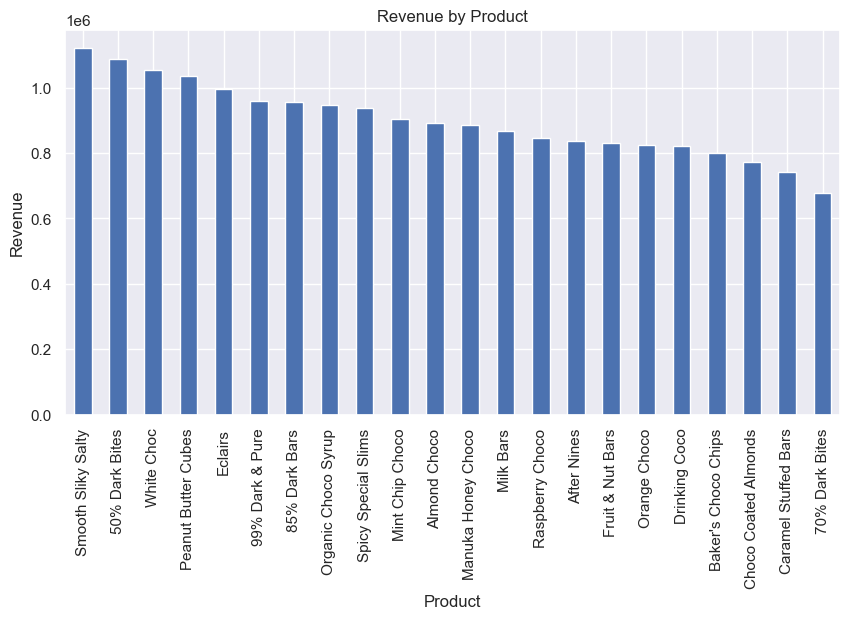

Product
Smooth Sliky Salty      1120201.09
50% Dark Bites          1087659.35
White Choc              1054257.00
Peanut Butter Cubes     1036591.09
Eclairs                  996947.96
99% Dark & Pure          960033.45
85% Dark Bars            955268.24
Organic Choco Syrup      945345.73
Spicy Special Slims      938131.69
Mint Chip Choco          904989.55
Almond Choco             890454.65
Manuka Honey Choco       885208.03
Milk Bars                866273.62
Raspberry Choco          845388.41
After Nines              837215.67
Fruit & Nut Bars         829278.96
Orange Choco             824070.85
Drinking Coco            822245.57
Baker's Choco Chips      799085.67
Choco Coated Almonds     773062.91
Caramel Stuffed Bars     742516.15
70% Dark Bites           677346.22
Name: Amount, dtype: float64

In [19]:
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

product_revenue

In [20]:
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64

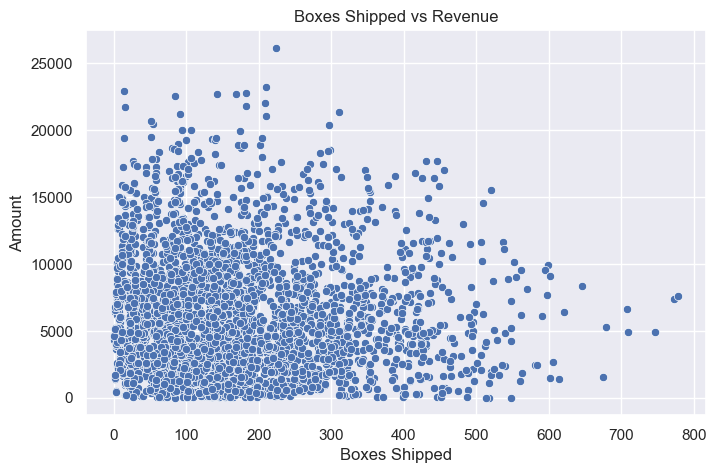

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Revenue")
plt.show()

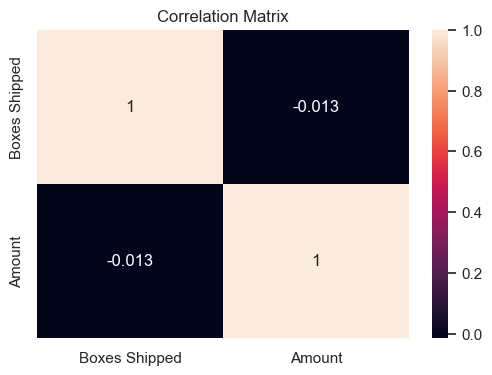

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Boxes Shipped', 'Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

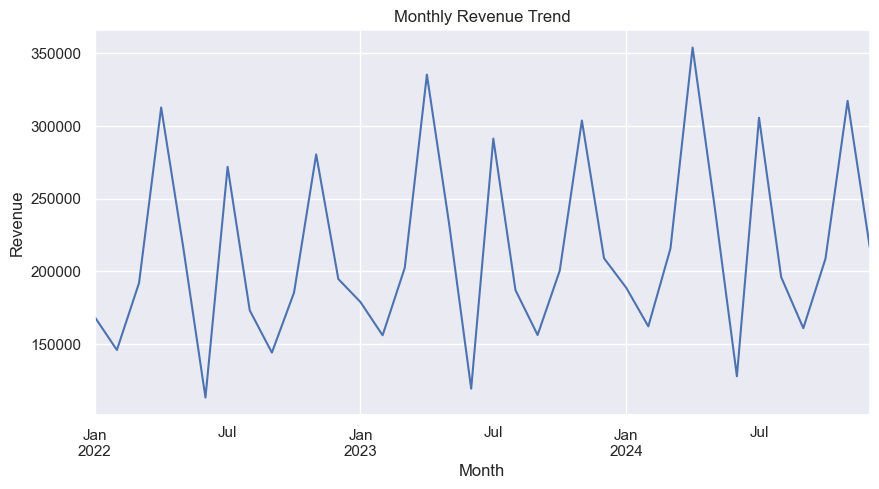

In [23]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()